In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import thinkstats2 as ts
import thinkplot as tp
import scipy
import statsmodels.formula.api as smf

In [22]:
diabetes = pd.read_csv('diabetes.csv')
print(diabetes.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


Text(0, 0.5, 'Frequency')

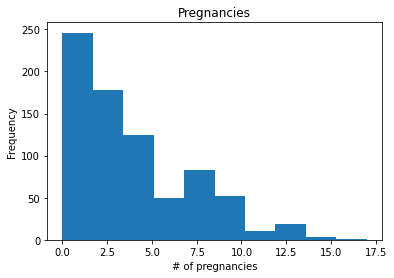

In [23]:
# Central Tendency: The values look like they cluster around the 0-2 range
# Modes: There seems to be only one cluster
# Spread: The data ranges all the way from 0 to 17
# Tails: The data does not drop off very quickly
# Outliers: There is an extreme value at 17
plt.hist(diabetes.Pregnancies)
plt.title('Pregnancies')
plt.xlabel('# of pregnancies')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

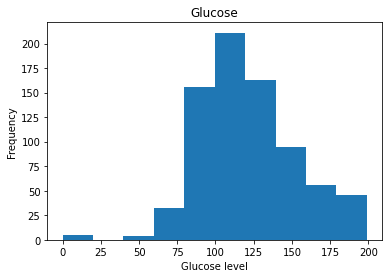

In [24]:
# Central Tendency: The values cluster around the 100-125 range
# Modes: There is only one cluster
# Spread: The data ranges from 0 to 200
# Tails: The data seems to drop of relatively quickly
# Outliers: There is a gap between 50 and 0. The data at 0 could be an outlier
plt.hist(diabetes.Glucose)
plt.title('Glucose')
plt.xlabel('Glucose level')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

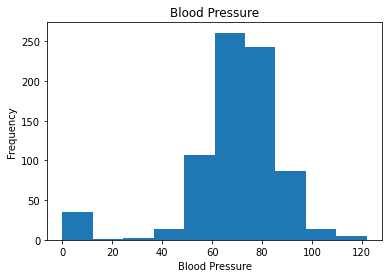

In [25]:
# Central Tendency: The values cluster around 70
# Modes: There is only one cluster
# Spread: The data ranges from 0 to 120
# Tails: The data seems to drop of relatively quickly
# Outliers: There is a gap between 40 and 0. The data at 0 could be an outlier
plt.hist(diabetes.BloodPressure)
plt.title('Blood Pressure')
plt.xlabel('Blood Pressure')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

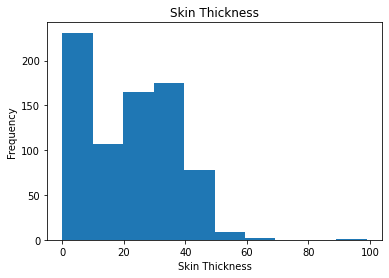

In [26]:
# Central Tendency: The values cluster around 30
# Modes: There is only one cluster
# Spread: The data ranges from 0 to 90
# Tails: The data does not drop off very quickly
# Outliers: There is a gap between 60 and 90. The data at 90 could be an outlier
plt.hist(diabetes.SkinThickness)
plt.title('Skin Thickness')
plt.xlabel('Skin Thickness')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

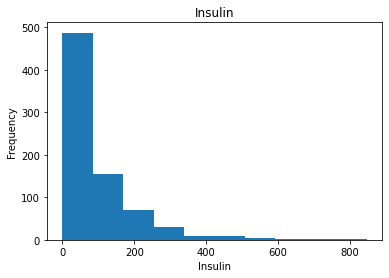

In [27]:
# Central Tendency: The values cluster around 0
# Modes: There is only one cluster
# Spread: The data ranges from 0 to 800
# Tails: The data seems to drop of relatively quickly
# Outliers: It doesn't look like there are any outliers
plt.hist(diabetes.Insulin)
plt.title('Insulin')
plt.xlabel('Insulin')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

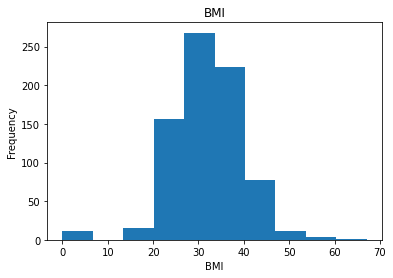

In [28]:
# Central Tendency: The values cluster around 30-40
# Modes: There is only one cluster
# Spread: The data ranges from 0 to 70
# Tails: The data seems to drop of relatively quickly
# Outliers: There is a gap between 15 and 0. The data at 0 could be an outlier
plt.hist(diabetes.BMI)
plt.title('BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

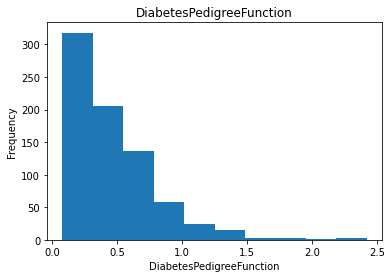

In [29]:
# Central Tendency: The values cluster around 0
# Modes: There is only one cluster
# Spread: The data ranges from 0 to 2.5
# Tails: The data seems to drop of relatively quickly
# Outliers: It doesn't look like there are any outliers
plt.hist(diabetes.DiabetesPedigreeFunction)
plt.title('DiabetesPedigreeFunction')
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

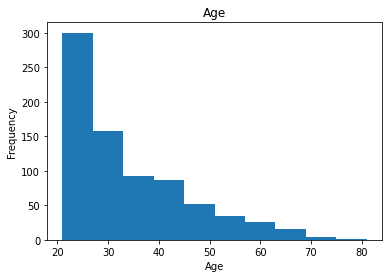

In [30]:
# Central Tendency: The values cluster around 0
# Modes: There is only one cluster
# Spread: The data ranges from 0 to 80
# Tails: The data seems to drop of relatively quickly
# Outliers: It doesn't look like there are any outliers
plt.hist(diabetes.Age)
plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

In [31]:
# After some research, I was able to find that more than 15 pregnancies is unlikely
print(sum(diabetes.Pregnancies > 15))
# A blood glucose level of less than 20 is also extremely unlikely
print(sum(diabetes.Glucose < 20))
# There are observations with a blood pressure of 0. This is impossible unless the subject
print(sum(diabetes.BloodPressure < 20))
# A BMI of less than 15 is unlikely
print(sum(diabetes.BMI < 15))

1
5
35
11


In [32]:
diagnosed = diabetes[diabetes.Outcome == 1]
bpclean = diagnosed[diagnosed.BloodPressure != 0]
pregclean = bpclean[bpclean.Pregnancies != 0]
gluclean = pregclean[pregclean.Glucose != 0]
skinclean = gluclean[gluclean.SkinThickness != 0]
diagclean = skinclean[skinclean.BMI != 0]

non = diabetes[diabetes.Outcome == 0]
bpnon = non[non.BloodPressure != 0]
pregnon = bpnon[bpnon.Pregnancies != 0]
glucnon = pregnon[pregnon.Glucose != 0]
skinnon = glucnon[glucnon.SkinThickness != 0]
nonclean = skinnon[skinnon.BMI != 0]


In [33]:
pmf1 = ts.Pmf(diagnosed.Pregnancies)
pmf2 = ts.Pmf(non.Pregnancies)

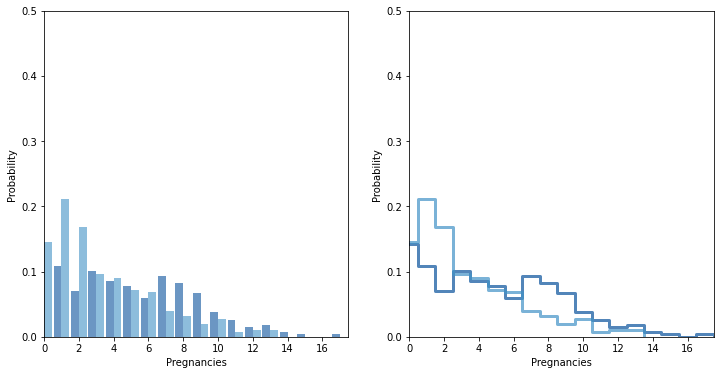

<Figure size 576x432 with 0 Axes>

In [34]:
# Comparing pregnancy PMFs based on diabetes diagnosis

width = 0.45
tp.PrePlot(2, cols=2)
tp.Hist(pmf1, align='right', width=width)
tp.Hist(pmf2, align='left', width=width)
tp.Config(xlabel='Pregnancies', ylabel='Probability', axis=[0,17.5,0,0.5])
tp.preplot(2)
tp.subplot(2)
tp.Pmfs([pmf1, pmf2])
tp.Show(xlabel='Pregnancies', ylabel='Probability', axis=[0,17.5,0,0.5])

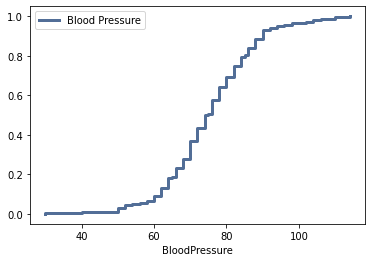

75.32142857142857


<Figure size 576x432 with 0 Axes>

In [35]:
# Create CDF
cdf = ts.Cdf(bpclean.BloodPressure, label='Blood Pressure')
tp.Cdf(cdf)
tp.Show(xlabel='BloodPressure')
print(np.average(bpclean.BloodPressure))
# The CDF shows that around 20% of the diabetes cases happened in women a blood pressure of 60

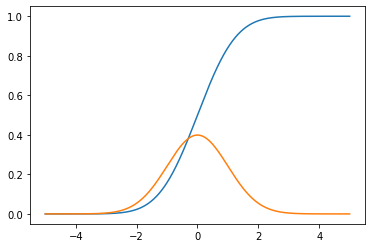

In [36]:
# create parameters for standard normal distribution
x=np.linspace(-5,5,5000)
mu=0
sigma=1
# create standard normal cdf and pdf
norm_cdf = scipy.stats.norm.cdf(x,mu,sigma)
norm_pdf = scipy.stats.norm.pdf(x,mu,sigma)
# plot cdf and pdf
plt.plot(x,norm_cdf,label='Normal CDF')
plt.plot(x,norm_pdf,label='Normal PDF')

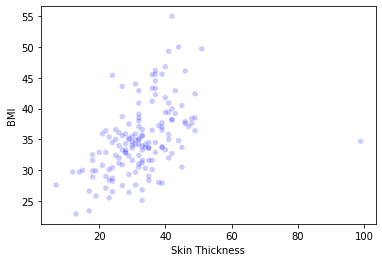

Covariance is 27.32664
Pearsons correlation is 0.4656317567682143


<Figure size 576x432 with 0 Axes>

In [37]:
tp.scatter(diagclean.SkinThickness, diagclean.BMI)
tp.show(xlabel='Skin Thickness',ylabel='BMI')
print('Covariance is',ts.Cov(diagclean.SkinThickness, diagclean.BMI))
print('Pearsons correlation is', ts.Corr(diagclean.SkinThickness, diagclean.BMI))

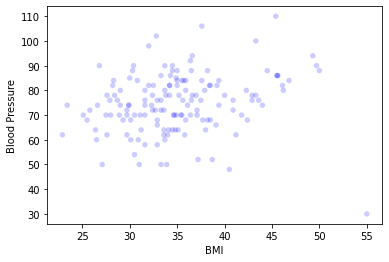

Covariance is 13.250088888888884
Pearsons correlation is 0.19437478953285856


<Figure size 576x432 with 0 Axes>

In [38]:
tp.scatter(diagclean.BMI, diagclean.BloodPressure)
tp.show(xlabel='BMI',ylabel='Blood Pressure')
print('Covariance is',ts.Cov(diagclean.BloodPressure, diagclean.BMI))
print('Pearsons correlation is', ts.Corr(diagclean.BloodPressure, diagclean.BMI))

0.0


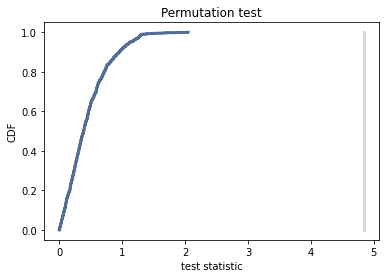

<Figure size 576x432 with 0 Axes>

In [39]:
data = diagnosed.BMI, non.BMI
class DiffMeansPermute(ts.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

ht = DiffMeansPermute(data)
pval = ht.PValue()
print(pval)
ht.PlotCdf()
tp.Show(title='Permutation test',xlabel='test statistic',ylabel='CDF')
# The result is less than 0.001 meaning that we wouldn't expect to see a result like this really ever
# The effect is statistically significant

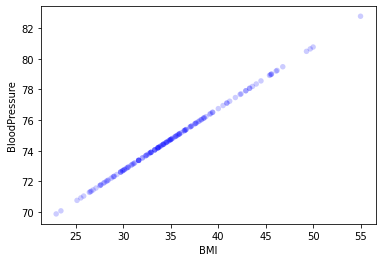

<Figure size 576x432 with 0 Axes>

In [40]:
inter, slope = ts.LeastSquares(diagclean.BMI, diagclean.BloodPressure)
fitxs, fitys = ts.FitLine(diagclean.BMI, inter, slope)

tp.Scatter(fitxs, fitys)
tp.Show(xlabel='BMI', ylabel='BloodPressure')

In [41]:
BMI=diagclean.BMI
BloodPressure=diagclean.BloodPressure
formula = 'BloodPressure ~ BMI'
model = smf.ols(formula, data=diagclean)
results = model.fit()

inter = results.params['Intercept']
slope = results.params['BMI']
slope_pvalue = results.pvalues['BMI']

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          BloodPressure   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     5.811
Date:                Sun, 22 Nov 2020   Prob (F-statistic):             0.0172
Time:                        19:19:55   Log-Likelihood:                -581.12
No. Observations:                 150   AIC:                             1166.
Df Residuals:                     148   BIC:                             1172.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     60.6653      5.914     10.258      0.0